# **House Price Prediction**
on California Price Dataset using XGBoost Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

In [ ]:
housing = fetch_california_housing()
housing_df=pd.DataFrame(housing.data,columns=housing.feature_names)
housing_df['Price'] = housing.target

In [ ]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
housing_df.shape

(20640, 9)

In [ ]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
housing_df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


In [ ]:
correlation=housing_df.corr()

<Axes: >

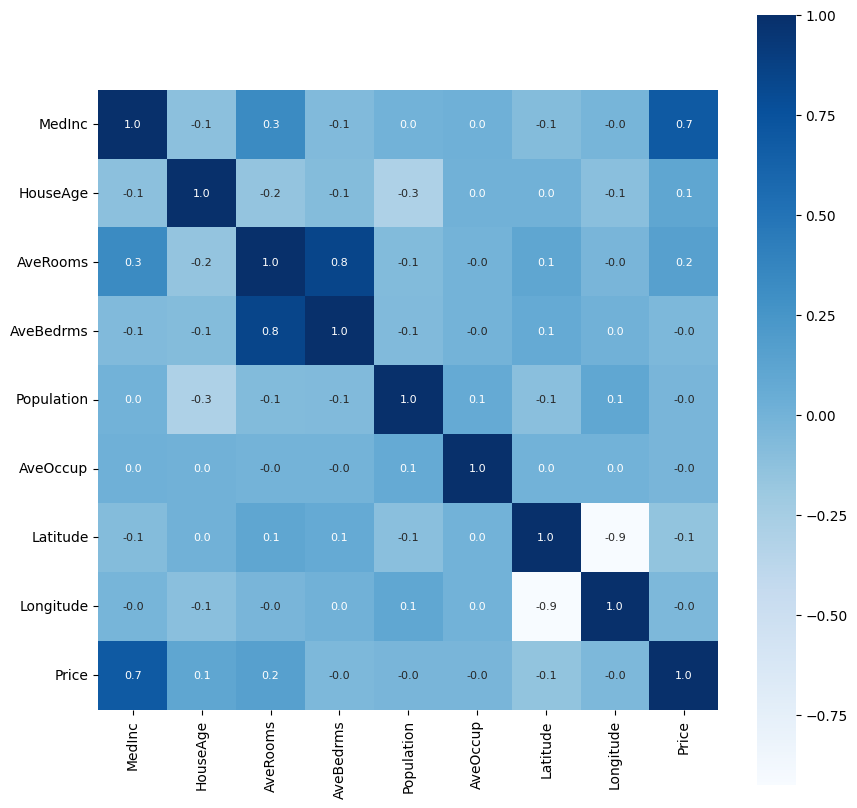

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
X=housing_df.drop(['Price'],axis=1)
Y=housing_df['Price']
X.shape,Y.shape


((20640, 8), (20640,))

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)


In [ ]:
model=XGBRegressor()
model.fit(X_train,Y_train)
train_predict=model.predict(X_train)
print(train_predict)

[1.2811276 3.5806673 1.795477  ... 2.308142  2.5287933 3.645046 ]


In [ ]:
score1=metrics.r2_score(Y_train,train_predict)
print('R squared error : ',score1)
score2=metrics.mean_absolute_error(Y_train,train_predict)
print('Mean Absolute Error : ',score2)

R squared error :  0.9445725845802867
Mean Absolute Error :  0.19257627556572793


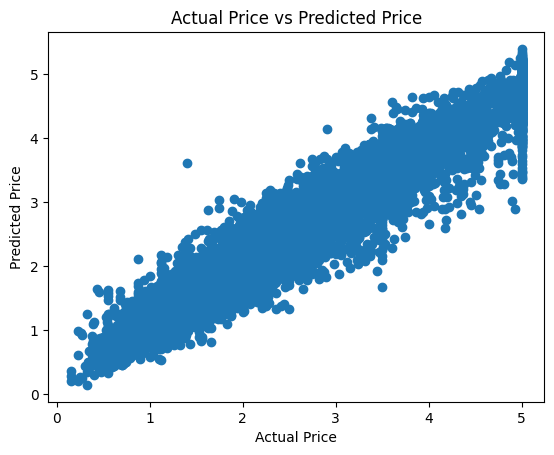

In [ ]:
plt.scatter(Y_train,train_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [ ]:
test_predict=model.predict(X_test)
score11=metrics.r2_score(Y_test,test_predict)
print('R squared error : ',score11)
score22=metrics.mean_absolute_error(Y_test,test_predict)
print('Mean Absolute Error : ',score22)

R squared error :  0.8301370561019205
Mean Absolute Error :  0.30957335413783094


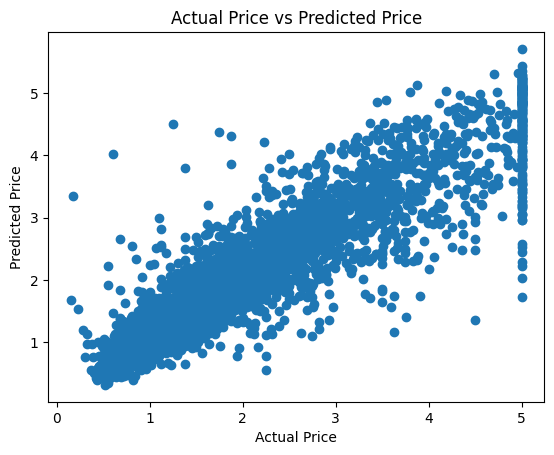

In [ ]:
plt.scatter(Y_test,test_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()